Summary:
- Accessing and manipulating image pixels
- Resizing images
- Cropping
- Flipping

Import libraries

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

Download assets

In [3]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")
        os.remove(save_path)
    except Exception as e:
        print("\nInvalid file.", e)

URL = r"https://www.dropbox.com/s/rys6f1vprily2bg/opencv_bootcamp_assets_NB2.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB2.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)  

Accessing and manipulating image pixels is like editing an image and drawing what you want. For example with grayscale:

In [4]:
checkers = cv2.imread("checkerboard_18x18.png", 0)
print(checkers)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

Notice with the pixel values of that image, it can be manipulated manually by editing the values of the 2d array above.

In [6]:
print(checkers[0, 0]) # most left top pixel value
print(checkers[6, 0]) # most left top pixel value of the left middle white square

0
255


[[150   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0 150   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 150   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0 150   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0 150   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0 150 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

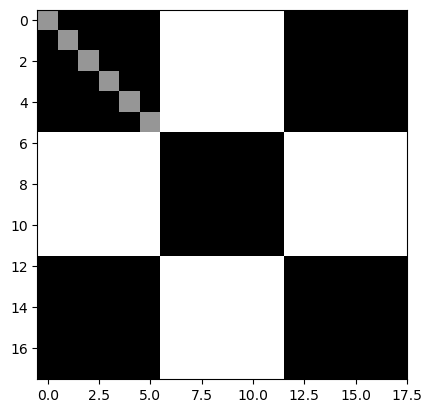

In [9]:
checkers_new = checkers.copy()
for i in range(6):
    checkers_new[i, i] = 150

print(checkers_new)
plt.imshow(checkers_new, cmap="gray")

Cropping images is also like manipulating pixel values but specifically using the measurements given by mpl

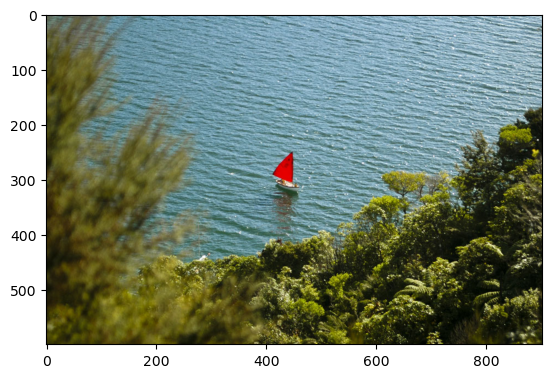

In [10]:
boat = cv2.imread("New_Zealand_Boat.jpg", 1)
boat = cv2.cvtColor(boat, cv2.COLOR_BGR2RGB)

plt.imshow(boat)

As you can see based on the measurements in mpl, the height is from 0 to around 600 and the length is 0 to around 850. We can crop the image by using index slicing (height, length)

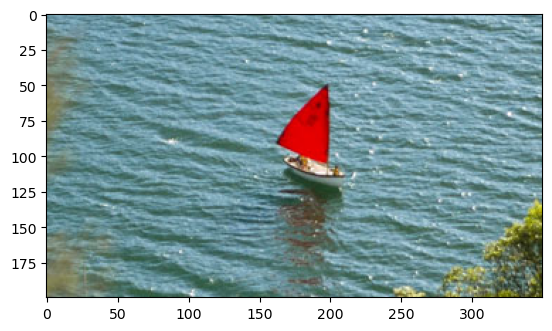

In [12]:
boat_crop = boat[200:400, 250:600]
plt.imshow(boat_crop)

There are multiple ways to crop an image.

One way is to use use scaling factors fx and fy via the `cv2.resize()` function

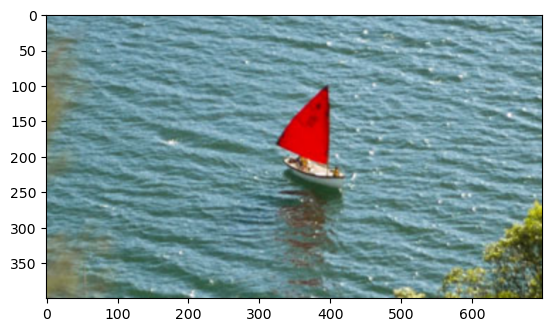

In [13]:
boat_resize = cv2.resize(boat_crop, None, fx=2, fy=2)
plt.imshow(boat_resize) # notice the plt measurements are double

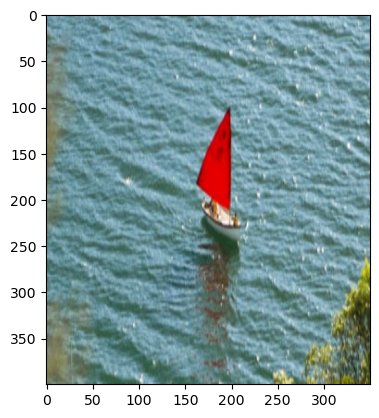

In [14]:
boat_resize = cv2.resize(boat_crop, None, fx=1, fy=2)
plt.imshow(boat_resize) # x measurements remain the same, y measurements doubled

Another way is to use a direct exact dimension resize by also using `cv2.resize()` with a specified interpolation algorithm.

For interpolations:
- Shrinking images use `cv2.INTER_AREA`
- Enlarging images use `cv2.INTER_LINEAR`

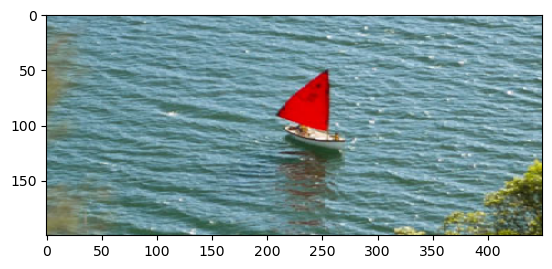

In [16]:
length = 450
height = 200
dim = (length, height)

boat_resize = cv2.resize(boat_crop, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(boat_resize)

You can also make it so obeys the aspect ratio of the original image by just adjusting either the length or height only:

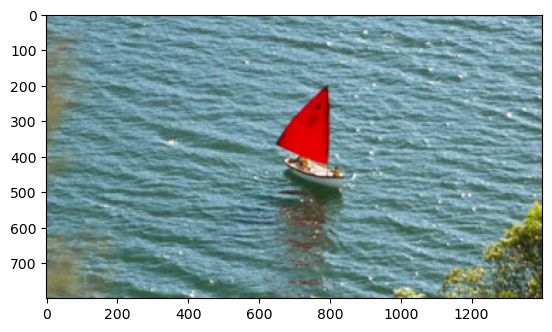

In [22]:
def flexible_dim(img, width=0,height=0):
    if width != 0 and height == 0:
        aspect_ratio = width / img.shape[1]
        height = int(img.shape[0] * aspect_ratio)
        return (width, height)
    elif height != 0 and width == 0:
        aspect_ratio = height / img.shape[0]
        width = int(img.shape[1] * aspect_ratio)
        return (width, height)
    else:
        print("Only change one dimension!")
        return None

dim = flexible_dim(boat_crop, height=800)

boat_resize = cv2.resize(boat_crop, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(boat_resize)

Now let's see if the difference in file format by comparing the original cropped and resized cropped images by saving it:

In [24]:
# Note that before saving images, always flip the color channel first

boat_crop = boat_crop[:, :, ::-1]
boat_resize = boat_resize[:, :, ::-1]

cv2.imwrite("cropped_boat.jpg", boat_crop)
cv2.imwrite("big_cropped_boat.jpg", boat_resize)

True

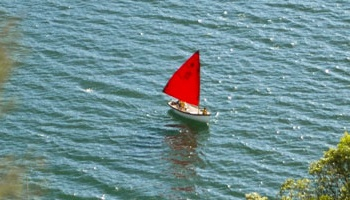

In [26]:
Image(filename="cropped_boat.jpg")

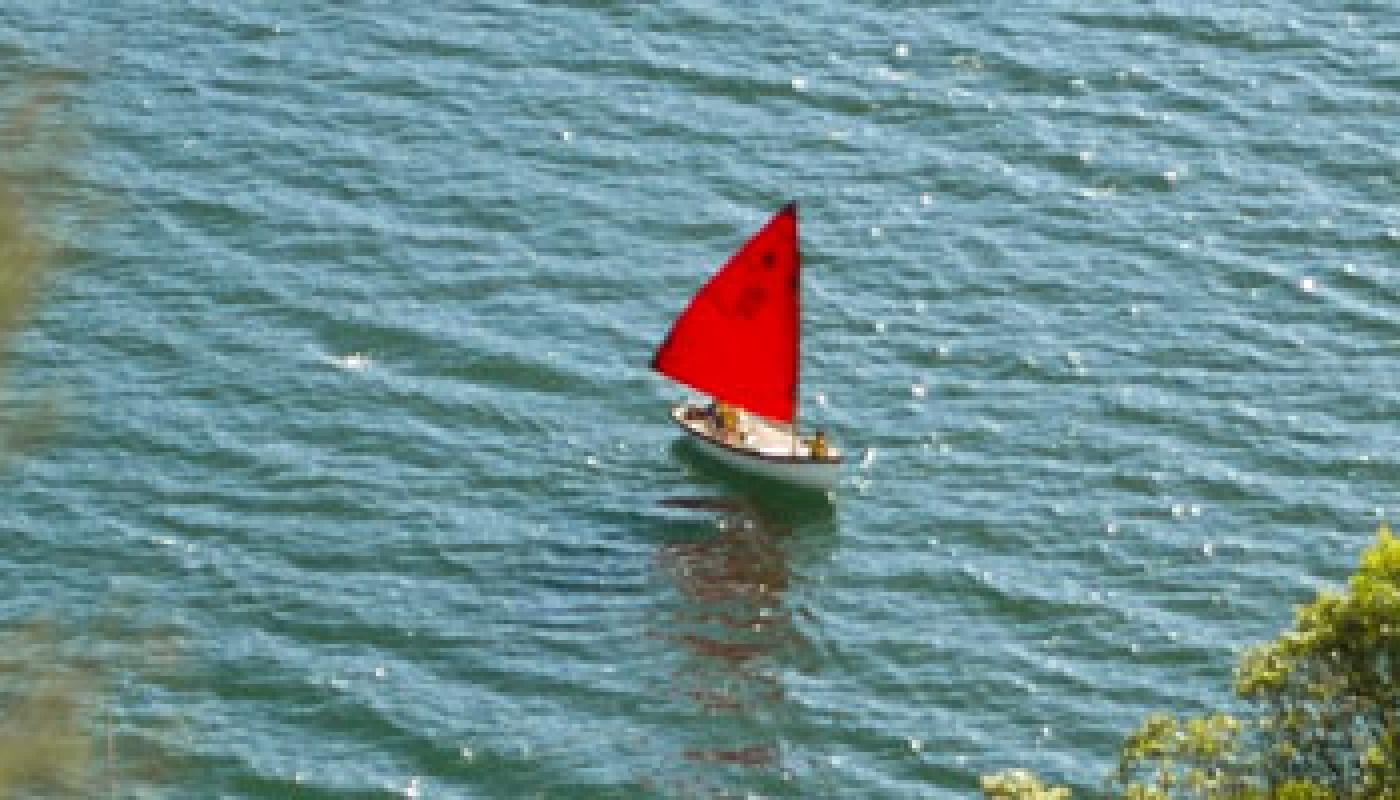

In [27]:
Image(filename="big_cropped_boat.jpg")

Flipping images can can be used through `cv2.flip(src, flipCode)`

where:
- src is the image
- flipCode is an integer that corresponds to certain flips:
    - 0 for flipping around the x-axis (vertical flip)
    - 1 for flipping around the y-axis (horizontal flip)
    - -1 for flipping around both axis

Text(0.5, 1.0, 'Both Flipped')

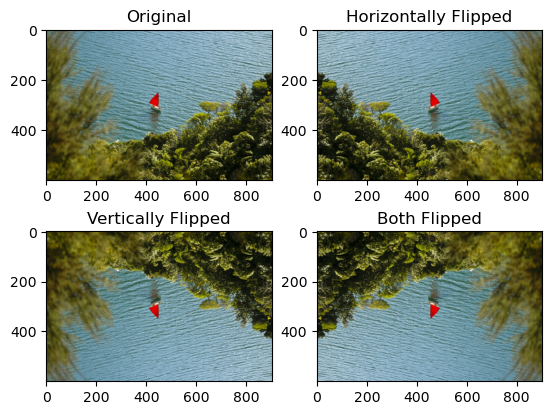

In [35]:
boat_hflip = cv2.flip(boat, 1)
boat_vflip = cv2.flip(boat, 0)
boat_bflip = cv2.flip(boat, -1)

plt.subplot(221)
plt.imshow(boat)
plt.title("Original")

plt.subplot(222)
plt.imshow(boat_hflip)
plt.title("Horizontally Flipped")

plt.subplot(223)
plt.imshow(boat_vflip)
plt.title("Vertically Flipped")

plt.subplot(224)
plt.imshow(boat_bflip)
plt.title("Both Flipped")